In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv(r'G:\machine learning\Hands-on-Assignment (2)\Hands-on-Assignment\LVC datasets\Assisted Practice\Lesson 5\voice-classification.csv')
pd.options.display.max_columns = None

In [4]:
data.head(7)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,0.086197,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male


In [5]:
data.shape

(3168, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [7]:
data.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [8]:
print('Total no of labels= {}'.format(data.shape[0]))

Total no of labels= 3168


In [9]:
'Total no of males = {}'.format(data['label'].loc[data['label']=='male'].count())

'Total no of males = 1584'

In [10]:
data.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


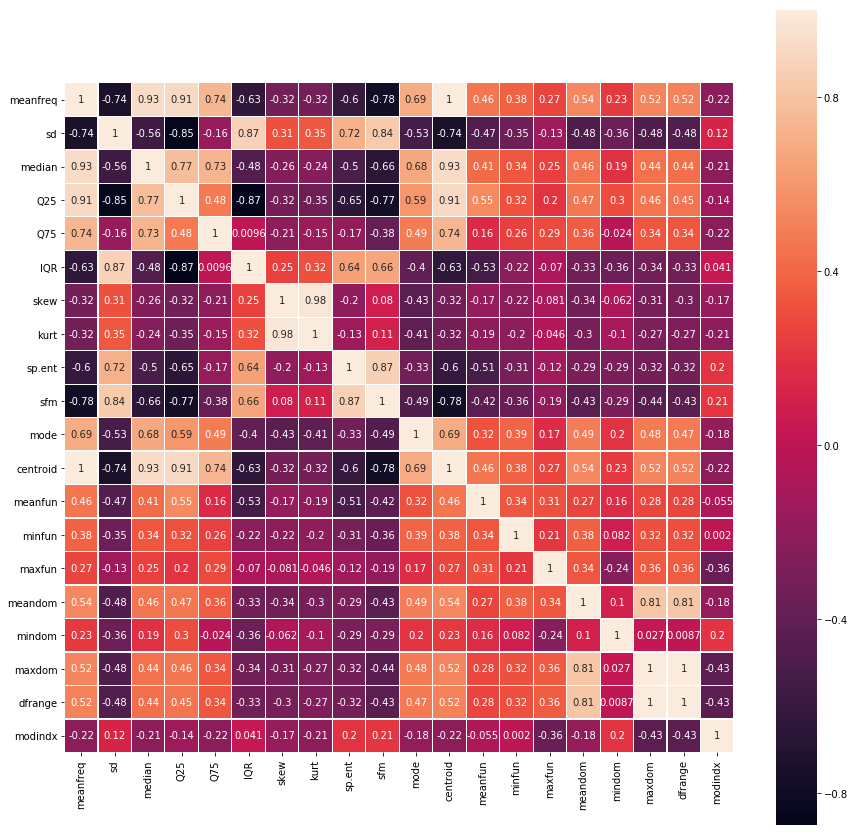

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), square=True,linewidths=0.2,annot=True)

In [123]:
data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

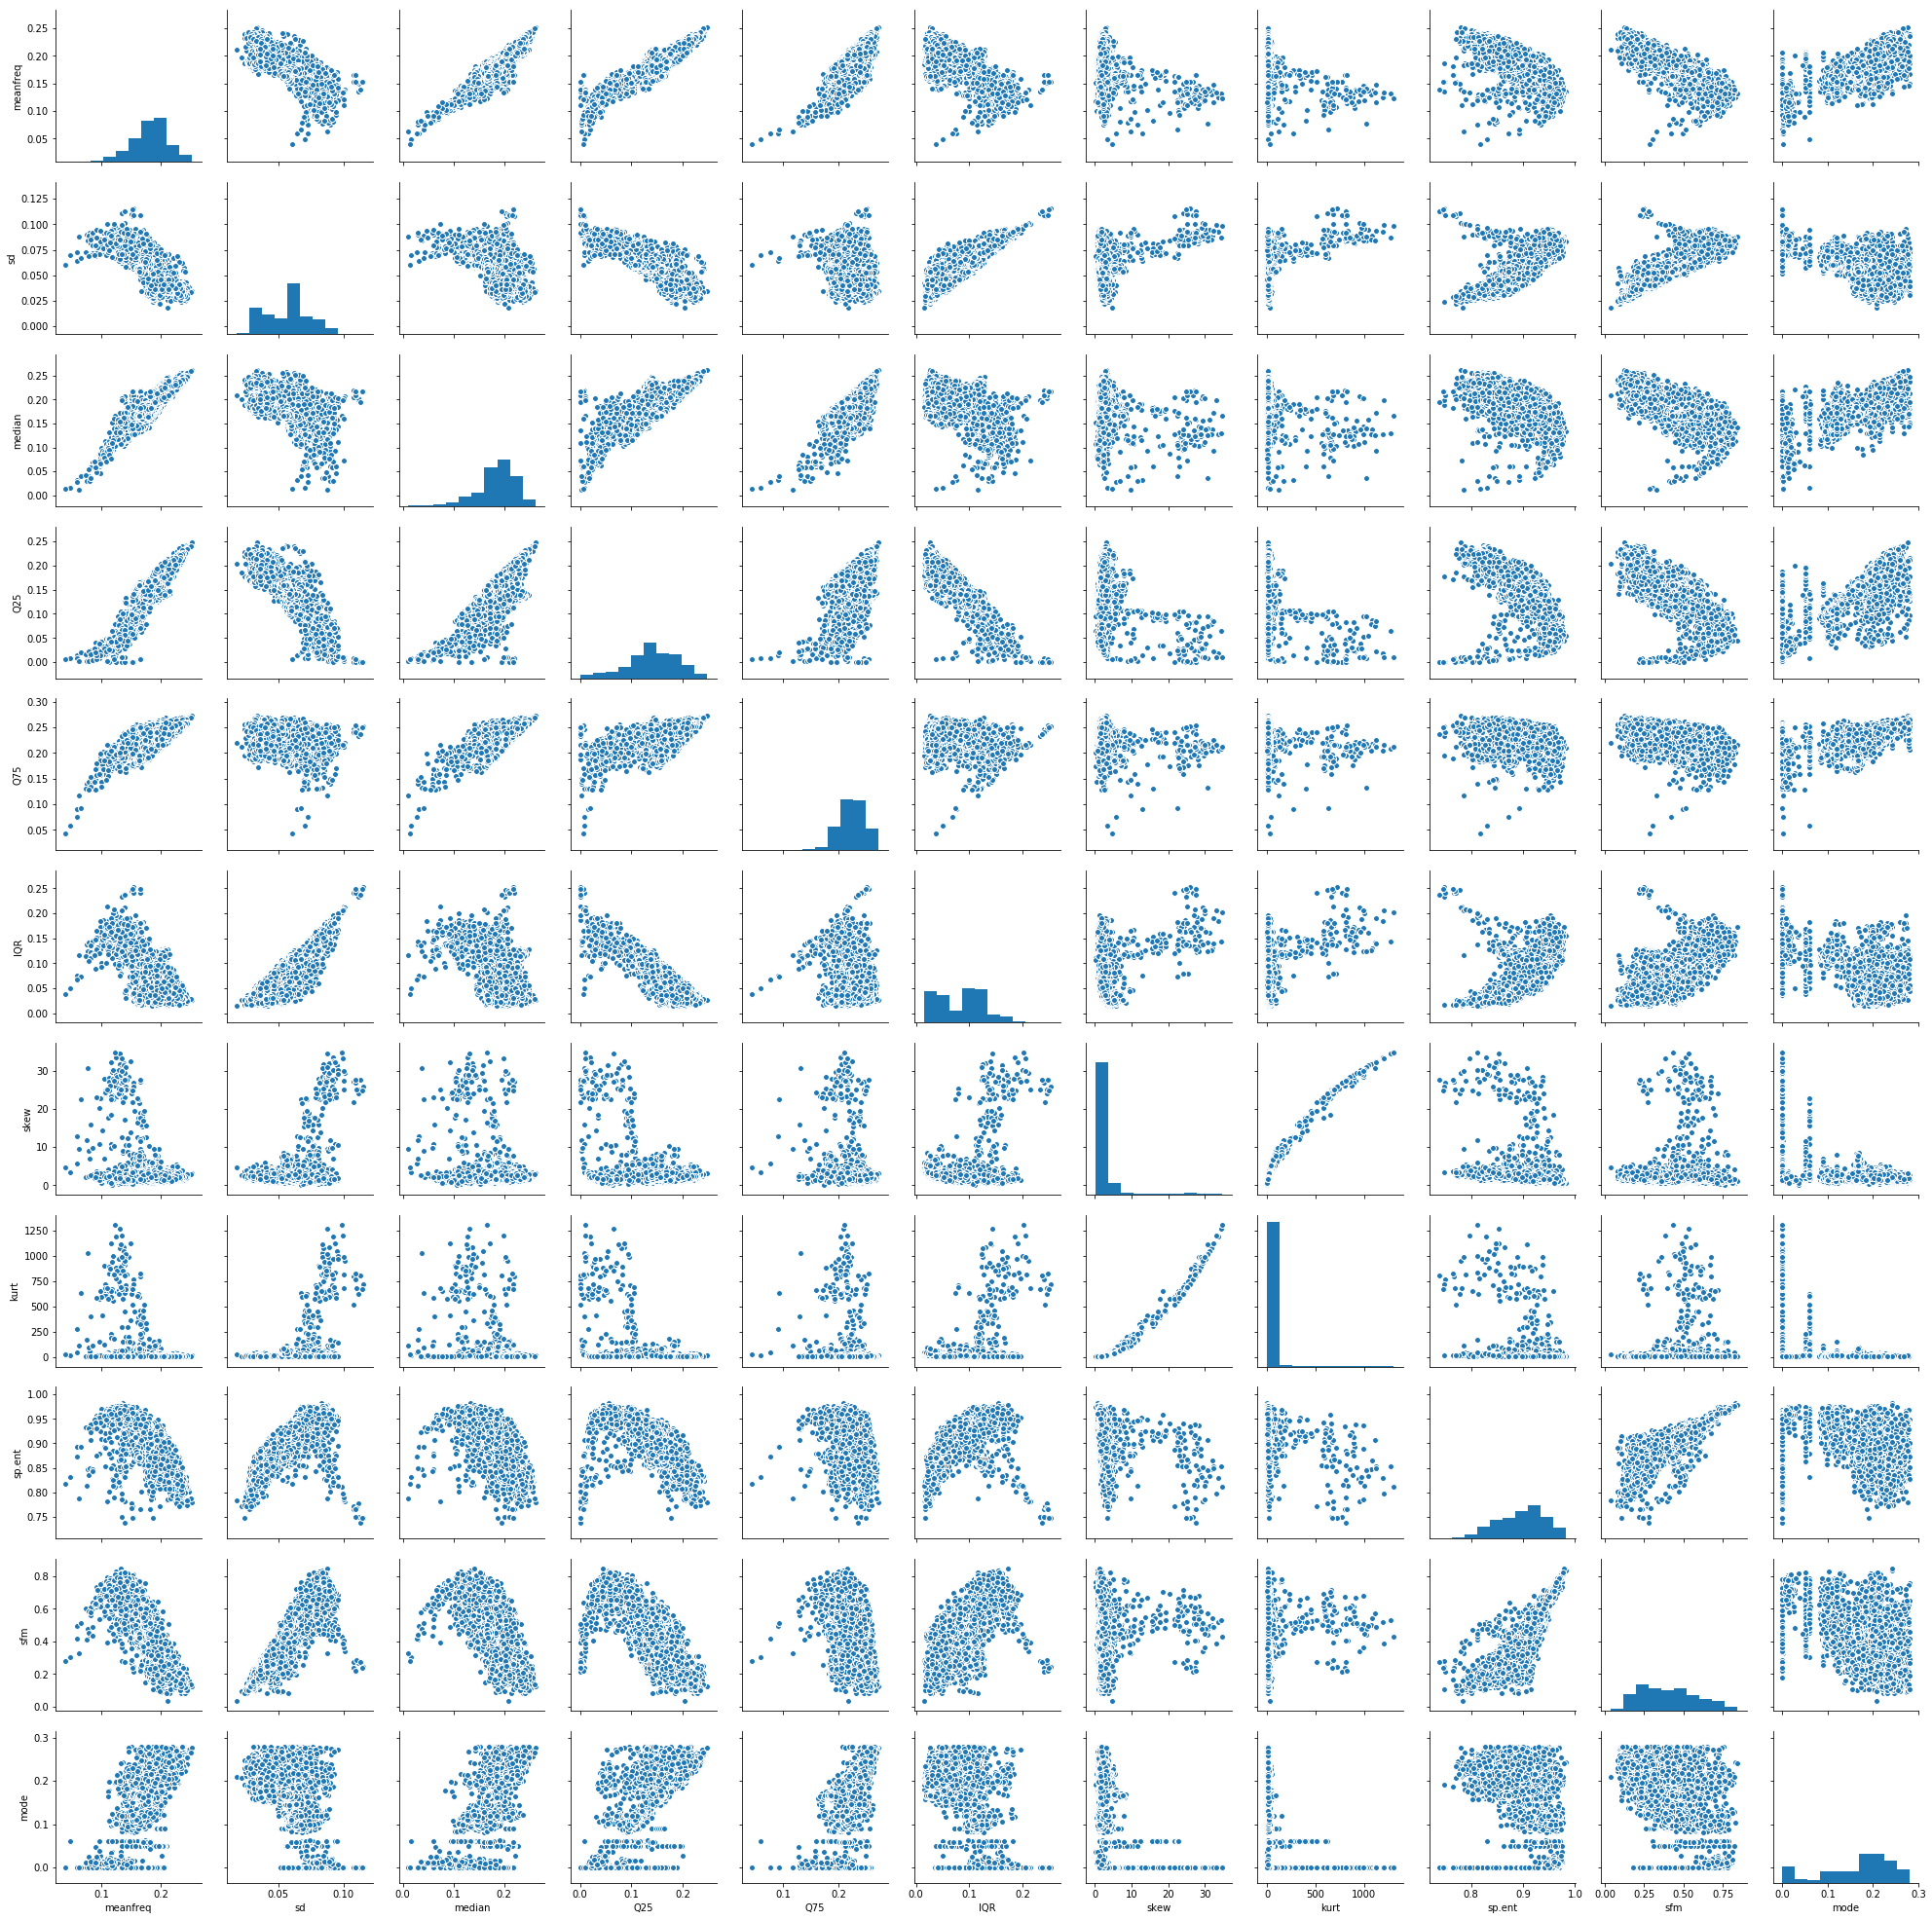

In [124]:
sns.pairplot(data[['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode']])

In [19]:
X=data.iloc[:,:-1]d
Y = data.iloc[:,-1]

In [21]:
Y.head(6)

0    male
1    male
2    male
3    male
4    male
5    male
Name: label, dtype: object

In [22]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()

In [23]:
Y = le.fit_transform(Y)

In [25]:
Y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [28]:
X= sc.fit_transform(X)

In [29]:
X[0:5]

array([[-4.04924806,  0.4273553 , -4.22490077, -2.57610164, -5.69360723,
        -0.21477826,  2.29330585,  1.76294635, -0.03908279,  0.4715753 ,
        -2.14121031, -4.04924806, -1.81203825, -1.0979981 ,  0.56595854,
        -1.5642046 , -0.70840431, -1.43142165, -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, -2.48688452, -5.58898726,
        -0.25848536,  4.54805598,  4.43300778, -0.06523603,  0.59443122,
        -2.14121031, -3.84105325, -1.07959443, -1.09153262, -0.29403034,
        -1.56191576, -0.70840431, -1.41810716, -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, -2.7069865 , -3.92869875,
         0.90932569,  6.51365636,  7.32620677, -1.08373029,  0.39826097,
        -2.14121031, -3.46306647, -1.36536788, -1.10039656,  0.41048032,
        -1.56386648, -0.70840431, -1.42920257, -1.41691733, -1.06534356],
       [-0.99215739,  0.89999793, -0.75945371, -0.90141834, -0.7112046 ,
         0.63269035, -0.44985837, -0.24009931,  

In [34]:
data['meanfreq'].describe()

count    3168.000000
mean        0.180907
std         0.029918
min         0.039363
25%         0.163662
50%         0.184838
75%         0.199146
max         0.251124
Name: meanfreq, dtype: float64

In [38]:
(data['meanfreq'][0]-data['meanfreq'].mean())/data['meanfreq'].std()

-4.048608920961344

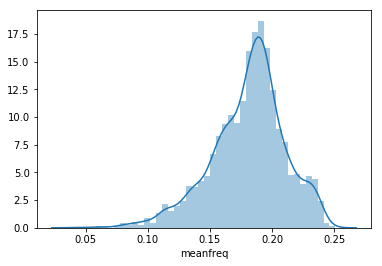

In [39]:
sns.distplot(data['meanfreq'])

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=45)

In [127]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [133]:
svc =SVC(kernel='rbf')
svc.fit(X_train, Y_train)
svc.predict(X_test)
display(metrics.accuracy_score(Y_test, svc.predict(X_test)))
display(metrics.confusion_matrix(Y_test, svc.predict(X_test)))

0.9797979797979798

array([[398,   3],
       [ 13, 378]], dtype=int64)

In [134]:
svc =SVC(kernel='linear')
svc.fit(X_train, Y_train)
svc.predict(X_test)
display(metrics.accuracy_score(Y_test, svc.predict(X_test)))
display(metrics.confusion_matrix(Y_test, svc.predict(X_test)))

0.9709595959595959

array([[395,   6],
       [ 17, 374]], dtype=int64)

In [135]:
svc =SVC(kernel='poly')
svc.fit(X_train, Y_train)
svc.predict(X_test)
display(metrics.accuracy_score(Y_test, svc.predict(X_test)))
display(metrics.confusion_matrix(Y_test, svc.predict(X_test)))

0.9671717171717171

array([[381,  20],
       [  6, 385]], dtype=int64)

######Performing K fold validations with diff kernels#######

In [141]:
#linear
from sklearn.model_selection import cross_val_score
svc =SVC(kernel='linear')
cv_score=cross_val_score(svc, X, Y, cv=10)
print(cv_score)
print(cv_score.mean())

[0.91194969 0.97169811 0.97169811 0.97169811 0.96202532 0.98734177
 0.99050633 0.98101266 0.95253165 0.99367089]
0.9694132632752168


In [142]:
#RBF
from sklearn.model_selection import cross_val_score
svc =SVC(kernel='rbf')
cv_score=cross_val_score(svc, X, Y, cv=10)
print(cv_score)
print(cv_score.mean())

[0.93396226 0.95597484 0.96855346 0.9591195  0.96835443 0.99683544
 0.98734177 0.98101266 0.91455696 0.99367089]
0.9659382214791815


In [143]:
#poly
from sklearn.model_selection import cross_val_score
svc =SVC(kernel='poly')
cv_score=cross_val_score(svc, X, Y, cv=10)
print(cv_score)
print(cv_score.mean())

[0.89937107 0.94654088 0.93081761 0.91509434 0.95886076 1.
 0.98101266 0.96835443 0.87974684 0.9778481 ]
0.9457646684181196


Keypoints:-
When K-fold cross validation is done we can see different score in each iteration.This happens because when we use train_test_split method,the dataset get split in random manner into testing and training dataset.Thus it depends on how the dataset got split and which samples are training set and which samples are in testing set.
With K-fold cross validation we can see that the dataset got split into 10 equal parts thus covering all the data into training as well into testing set.This is the reason we got 10 different accuracy score.

Taking all the values of C and checking out the accuracy score with kernel as linear.

The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.
Thus for a very large values we can cause overfitting of the model and for a very small value of C we can cause underfitting.Thus the value of C must be chosen in such a manner that it generalised the unseen data well

In [162]:
c_values=list(np.arange(0.1,100, 10))
acc_score=[]
for c in c_values:
    svc =SVC(kernel='linear',C=c)
    cv_score= cross_val_score(svc, X, Y, cv=10)
    acc_score.append(cv_score.mean())

In [166]:
acc_score

[0.9700481649550194,
 0.9684698670488018,
 0.9681534113525991,
 0.9681514210652018,
 0.9681514210652018,
 0.9681514210652018,
 0.9681514210652018,
 0.9681514210652018,
 0.9681514210652018,
 0.9681514210652018]

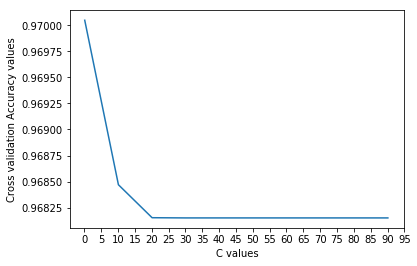

In [177]:
plt.plot(c_values, acc_score)
plt.xticks(np.arange(0,100,5))
plt.xlabel('C values')
plt.ylabel('Cross validation Accuracy values')
plt.show()
#thus accuracy is dec from 0.1 to 6 and then becoming constant 

In [178]:
#now lets look at the crossvalidation accuracy between 0 to 6
c_values=np.arange(0.1, 6, 0.5)
acc_scores=[]
for c in c_values:
    svc=SVC(C=c,kernel='linear')
    score=cross_val_score(svc, X, Y, cv=10)
    acc_scores.append(score.mean())

print(acc_scores)    

[0.9700481649550194, 0.9694132632752168, 0.9694132632752168, 0.9690987978664118, 0.9690987978664118, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9687843324576069, 0.9690987978664118, 0.9694132632752168]


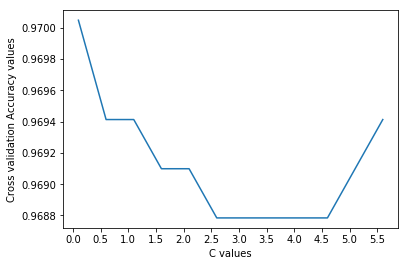

In [180]:
plt.plot(c_values, acc_scores)
plt.xticks(np.arange(0,6,0.5))
plt.xlabel('C values')
plt.ylabel('Cross validation Accuracy values')
plt.show()

####Technically, the gamma parameter is the inverse of the standard deviation of the RBF kernel (Gaussian function), which is used as similarity measure between two points. Intuitively, a small gamma value define a Gaussian function with a large variance. In this case, two points can be considered similar even if are far from each other. In the other hand, a large gamma value means define a Gaussian function with a small variance and in this case, two points are considered similar just if they are close to each other

In [188]:
g=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
acc_score1= []
for g in g:
    svc= SVC(C=0.1, kernel='rbf', gamma= g)
    cvs_score=cross_val_score(svc, X, Y, cv=10)
    acc_score1.append(cvs_score.mean())
    
print(acc_score1)    

[0.7657690470503942, 0.8843443993312634, 0.9527286840219726, 0.9567948411750657, 0.7074456651540483, 0.7391071570734813, 0.8409999203885041]


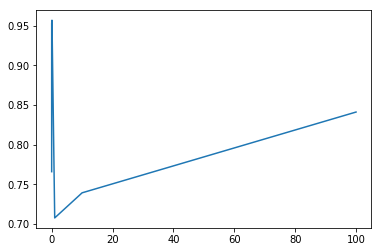

In [200]:
plt.plot([0.0001, 0.001, 0.01, 0.1, 1, 10, 100], acc_score1)
#lets take gaama to be 0.01

In [202]:
#Polynomials with diff degree curves
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, Y, cv=10)
    acc_score.append(scores.mean())
print(acc_score)

[0.8506926200143299, 0.9457646684181196, 0.8312116869675981, 0.8659820078019266, 0.7747571849375049]


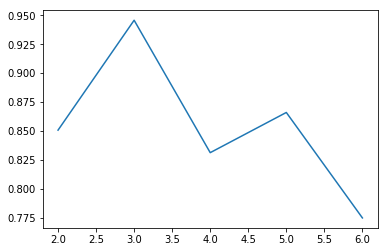

In [203]:
plt.plot([2,3,4,5,6], acc_score)
plt.show()
#thus 3 degree polynomial gives max accuracy

In [ ]:
#taking c=0.1 and gamma = 0.01 and kernel = rbf, linear and poly

In [205]:
#RBF 
from sklearn.svm import SVC
svc= SVC(C=0.1, kernel='rbf',gamma=0.01)
svc.fit(X_train,Y_train)
Y_predict=svc.predict(X_test)
metrics.accuracy_score(Y_test,Y_predict)

0.9772727272727273

In [209]:
#K=10
scores= cross_val_score(svc, X, Y, cv=10)
print(scores.mean())

0.9700481649550194


In [211]:
#Linear
from sklearn.svm import SVC
svc1= SVC(C=0.1, kernel='linear',gamma=0.01)
svc1.fit(X_train,Y_train)
Y_predict=svc.predict(X_test)
metrics.accuracy_score(Y_test,Y_predict)

0.9747474747474747

In [212]:
#K=10
scores1= cross_val_score(svc1, X, Y, cv=10)
print(scores1.mean())

0.9700481649550194


In [221]:
#Poly
from sklearn.svm import SVC
svc2= SVC(C=1, kernel='poly',degree=3, gamma=0.01)
svc2.fit(X_train,Y_train)
Y_predict=svc2.predict(X_test)
metrics.accuracy_score(Y_test,Y_predict)

0.8396464646464646

In [222]:
#K=10
scores2= cross_val_score(svc2, X, Y, cv=10)
print(scores2.mean())

0.8299160098718253


In [ ]:
#Let us perform Grid search technique for best parameter

In [227]:
from sklearn.grid_search import GridSearchCV
svm_model = SVC()
param={'C':[0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001], 'kernel':['rbf', 'linear','poly']}

In [230]:
gsv= GridSearchCV(svm_model, param_grid=param, cv=3, scoring='accuracy', refit=True)

In [231]:
gsv

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [232]:
gsv.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [233]:
gsv.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [234]:
gsv.predict(X_test)

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,

In [235]:
metrics.accuracy_score(Y_test, gsv.predict(X_test))

0.9797979797979798

In [236]:
gsv.best_score_

0.9823232323232324

In [94]:
print(cvs_score)

[0.94560669 0.9707113  0.958159   0.94936709 0.97046414 0.94936709
 0.96624473 0.95780591 0.97468354 0.94936709]


In [96]:
print(cvs_score.mean())

0.959177656550677


In [63]:
from sklearn.model_selection import GridSearchCV

In [97]:
param_grid={'C':[0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001], 'kernel':['rbf', 'linear']}

In [106]:
grid= GridSearchCV(SVC(), param_grid=param_grid, refit=True, cv=2)

In [107]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=2, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [108]:
grid_predictions= grid.predict(X_test)

In [109]:
metrics.accuracy_score(Y_test, grid_predictions)

0.9797979797979798

In [110]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [111]:
grid.best_score_

0.9814814814814815